# 📈 🎓 Analisis Regresi pada Student Performance Dataset Menggunakan Lasso dan Ridge Regression
## 🎯 Tujuan Proyek
Proyek ini bertujuan untuk membangun dan membandingkan performa dua algoritma regresi linear yang dilengkapi dengan regularisasi, yaitu Lasso Regression (L1) dan Ridge Regression (L2), dalam memprediksi nilai indeks performa siswa (Performance Index) berdasarkan karakteristik akademik dan kebiasaan siswa.

Dataset yang digunakan adalah Student Performance Dataset, yang berisi kombinasi data numerik dan kategorik, seperti jam belajar, skor sebelumnya, kegiatan ekstrakurikuler, jam tidur, dan jumlah latihan soal.

## ⚙️ Ruang Lingkup dan Tujuan Analisis
Analisis pada notebook ini difokuskan pada Linear Model dengan Regularisasi, dengan tujuan untuk:

1. Melakukan Exploratory Data Analysis (EDA) dan Data Cleaning (penanganan nilai kosong, duplikasi, dan outlier).

2. Menentukan fitur (X) dan target (y), di mana target yang digunakan adalah Performance Index.

3. Membangun dua pipeline model regresi, yaitu:

    - Pipeline 1: Lasso Regression

    - Pipeline 2: Ridge Regression

4. Membandingkan performa kedua model dengan variasi:

    - Scaling: StandardScaler dan MinMaxScaler.

    - Feature Selection: SelectKBest dan SelectPercentile.

5. Melakukan Hyperparameter Tuning (mencari nilai Alpha terbaik) menggunakan GridSearchCV dengan metode Cross Validation.

6. Mengevaluasi performa model berdasarkan metrik R², Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE).

⚖️ Alasan Pemilihan Model
Lasso Regression (Least Absolute Shrinkage and Selection Operator): Dipilih karena kemampuannya melakukan feature selection secara otomatis. Lasso dapat membuat koefisien fitur yang kurang penting menjadi tepat nol, sehingga menghasilkan model yang lebih sederhana dan mudah diinterpretasikan.

Ridge Regression: Digunakan untuk menangani masalah multikolinearitas (korelasi tinggi antar fitur) dan mencegah overfitting. Ridge memperkecil nilai koefisien fitur tetapi tidak sampai nol, sehingga menjaga semua fitur tetap berkontribusi namun dengan bobot yang terkontrol.

## 🧩 Tahapan Eksperimen
Tahapan eksperimen dalam penelitian ini dilakukan sebagai berikut:

1. Data Understanding dan Data Cleaning
Membaca dataset dan memeriksa tipe data.

Pengecekan dan penanganan missing value.

Pengecekan dan penghapusan data duplikat.

Deteksi outlier menggunakan metode IQR.

2. Data Encoding
Mengubah fitur kategorik Extracurricular Activities (Yes/No) menjadi bentuk numerik (1/0).

3. Penentuan Fitur dan Target
Menetapkan variabel independen (X) dan variabel dependen target (y).

4. Train–Test Split
Membagi dataset menjadi data latih (training) dan data uji (testing) untuk validasi model yang objektif.

5. Pembangunan Pipeline Model
Menyusun pipeline yang mencakup langkah-langkah:

Scaler: Menstandarisasi skala data.

Selector: Memilih fitur terbaik secara statistik.

Regressor: Algoritma Lasso atau Ridge.

6. Hyperparameter Tuning dan Cross Validation
Melakukan pencarian parameter terbaik (khususnya nilai alpha) menggunakan GridSearchCV.

7. Evaluasi dan Visualisasi
Mengevaluasi model menggunakan metrik regresi.

Membandingkan hasil prediksi dengan data aktual.

Menganalisis fitur-fitur yang paling berpengaruh.

8. Pemilihan Model Terbaik
Menentukan satu model terbaik (Lasso atau Ridge) berdasarkan skor evaluasi dan mengekspornya dalam format Pickle (.pkl) untuk implementasi pada aplikasi Streamlit.

## 📊 Hasil yang Diharapkan
Melalui rangkaian eksperimen ini, diharapkan:

1. Diperoleh model regresi linear terbaik yang mampu memprediksi performa siswa dengan akurasi tinggi (R² yang baik dan RMSE yang rendah).

2. Dapat membandingkan efektivitas regularisasi L1 (Lasso) vs L2 (Ridge) pada dataset ini.

3. Mengetahui faktor-faktor (fitur) apa saja yang paling signifikan dalam mempengaruhi nilai siswa.

4. Tersimpannya Best model yang siap digunakan di tahap deployment.

### Loading Data

In [208]:
import pandas as pd
import numpy as np

# 📊 Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Pembagian data & pencarian hyperparameter
from sklearn.model_selection import train_test_split, GridSearchCV

# ⚙️ Pra-pemrosesan & Seleksi Fitur
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

# 🤖 Model Regresi
from sklearn.linear_model import Lasso, Ridge

# 🧩 Pipeline & Utilitas
from sklearn.pipeline import Pipeline
import pickle
import warnings

#Kolom yang dipilih dari dataset
columns = ['Hours studied', 'Previous score', 'Extracurricular Activities', 'Sleep Hours' 
         ,'Sample Question Papers Practiced','Performance Index']
         
#Membaca dataset
df_house = pd.read_csv('dataset/Student_Performance.csv')

df_house.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [209]:
#Melihat jumlah baris dan kolom pada dataset
df_house.shape

(10000, 6)

In [210]:
#Mengubah data kategorikal pada kolom 'Extracurricular Activities' menjadi numerikal
df_house['Extracurricular Activities'] = df_house['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [211]:
# Mengecek jumlah missing value di setiap kolom
df_house.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [212]:
# Menghapus seluruh baris yang punya missing value
df = df_house.dropna(axis=0)

# Memastikan tidak ada missing value lag
df.isnull().sum()  

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [213]:
#Menghapus duplikat pada dataset
before = df_house.shape
dupes = df_house[df_house.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_house2 = df_house.drop_duplicates(keep='first')
print("Bentuk data sebelum/ setelah hapus duplikat:", before, "->", df_house2.shape)

Jumlah baris duplikat (terhitung ganda): 253
Bentuk data sebelum/ setelah hapus duplikat: (10000, 6) -> (9873, 6)


In [214]:
# Data Checking: Outlier (IQR)
numeric_cols = df_house.select_dtypes(include=np.number).columns

print("Pengecekan outlier menggunakan metode IQR:\n")

for col in numeric_cols:
    Q1 = df_house[col].quantile(0.25)
    Q3 = df_house[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df_house[col] < lower_bound) |
                     (df_house[col] > upper_bound)).sum()

    print(f"{col}: {outlier_count} outlier")

Pengecekan outlier menggunakan metode IQR:

Hours Studied: 0 outlier
Previous Scores: 0 outlier
Extracurricular Activities: 0 outlier
Sleep Hours: 0 outlier
Sample Question Papers Practiced: 0 outlier
Performance Index: 0 outlier


In [215]:
# Mengimpor StandardScaler untuk menstandarisasi data (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

# Mengambil fitur 'Gr Liv Area' sebagai input (X), diubah ke bentuk array NumPy 2D
X = df_house[['Hours Studied']].values

# Mengambil kolom '____' sebagai target (y), dalam bentuk array 1D
y = df_house['Performance Index'].values                                               # Silakan diisi bagian ini dengan kode yang tepat

# Membuat dua scaler terpisah: satu untuk fitur (X), satu untuk target (y)
sc_x = StandardScaler()
sc_y = StandardScaler()                                                       # Silakan diisi bagian ini dengan kode yang tepat

# Menstandarisasi X (menghitung mean dan std pada X, lalu mengubah datanya)
X_std = sc_x.fit_transform(X)

# y perlu dijadikan 2D menggunakan np.newaxis sebelum distandarisasi
# Hasil fit_transform dikembalikan ke 1D dengan .flatten()
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# 📊 Visualisasi Hubungan Antar Fitur

Dua visualisasi digunakan untuk memahami pola awal dataset:

- **Scatterplot Matrix**: melihat hubungan antar fitur dan mendeteksi pola/outlier.  


Visualisasi ini membantu memahami struktur data sebelum membangun model regresi.

In [216]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

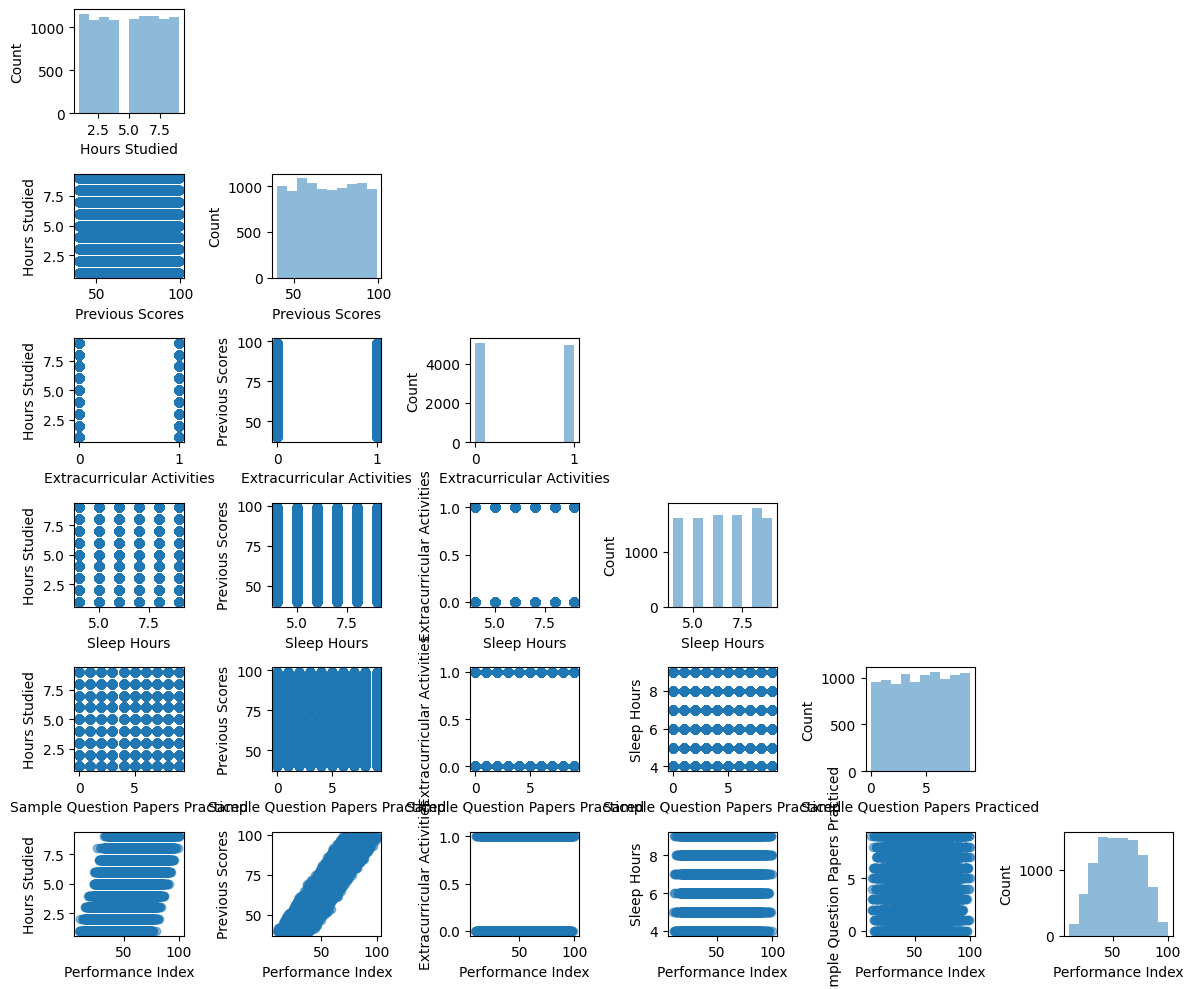

In [217]:
# Membuat scatterplot matrix untuk melihat hubungan antar fitur
scatterplotmatrix(df.values, figsize=(12, 10),               
                  names=df.columns,             # Membuat scatterplot matrix untuk melihat hubungan antar fitur
                  alpha=0.5)                    # transparansi titik

plt.tight_layout()
plt.show()                                     

### **Pembagian Data: Train/Test Split**

In [218]:
target_col = 'Performance Index'

# 1. Ambil X (Semua kolom KECUALI target)

feature_cols = df.drop(columns=[target_col]).columns.tolist()
X = df[feature_cols].values

# 2. Ambil y (Hanya kolom target)
y = df[target_col].values

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)

print(f"Fitur yang digunakan: {feature_cols}")
print(f"Shape Train: {X_train.shape}") 
print(f"Shape Test : {X_test.shape}")

Fitur yang digunakan: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
Shape Train: (7000, 5)
Shape Test : (3000, 5)


In [219]:
# =========================================================
# 1. DEFINISI PIPELINE (Sesuai Rubrik: Scaler -> Selector -> Model)
# =========================================================

# Pipeline 1: LASSO
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),       # Placeholder, akan divariasikan di GridSearch
    ('selector', SelectKBest()),        # Placeholder, akan divariasikan di GridSearch
    ('regressor', Lasso(random_state=98)) # Model Lasso
])

# Pipeline 2: RIDGE
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest()),
    ('regressor', Ridge(random_state=98)) # Model Ridge
])

# =========================================================
# 2. PARAMETER GRID (Skenario Eksperimen)
# =========================================================
# membuat skenario untuk membandingkan:
# - Scaler: StandardScaler vs MinMaxScaler
# - Selector: SelectKBest vs SelectPercentile
# - Hyperparameter Alpha: 0.01, 0.1, 1, 10
# =========================================================

param_grid = [
    # Skenario A: Menggunakan SelectKBest (Memilih k fitur terbaik)
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectKBest(score_func=f_regression)],
        'selector__k': [3, 4, 5, 'all'],            # Eksperimen jumlah fitur
        'regressor__alpha': [0.01, 0.1, 1, 10]      # Eksperimen alpha
    },
    # Skenario B: Menggunakan SelectPercentile (Memilih % fitur terbaik)
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectPercentile(score_func=f_regression)],
        'selector__percentile': [50, 75],           # Eksperimen persentase
        'regressor__alpha': [0.01, 0.1, 1, 10]
    }
]

# =========================================================
# 3. EKSEKUSI TRAINING (GridSearchCV)
# =========================================================

print("melatih model LASSO...")
grid_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train, y_train)
print(f"Skor R2 Terbaik Lasso: {grid_lasso.best_score_:.4f}")
print(f"   Parameter Terbaik: {grid_lasso.best_params_}\n")

print("melatih model RIDGE...")
grid_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
print(f"Skor R2 Terbaik Ridge: {grid_ridge.best_score_:.4f}")
print(f"   Parameter Terbaik: {grid_ridge.best_params_}")                 # Standarisasi fitur input

melatih model LASSO...
Skor R2 Terbaik Lasso: 0.9889
   Parameter Terbaik: {'regressor__alpha': 0.01, 'scaler': StandardScaler(), 'selector': SelectKBest(score_func=<function f_regression at 0x300111a80>), 'selector__k': 5}

melatih model RIDGE...
Skor R2 Terbaik Ridge: 0.9889
   Parameter Terbaik: {'regressor__alpha': 0.01, 'scaler': MinMaxScaler(), 'selector': SelectKBest(score_func=<function f_regression at 0x300111a80>), 'selector__k': 5}


✅ Fitur yang terdeteksi: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

📊 HASIL EVALUASI: LASSO
R2 Score (Test) : 0.9882
MSE             : 4.2708
MAE             : 1.6374
RMSE            : 2.0666
Fitur Terpilih: [np.str_('Hours Studied'), np.str_('Previous Scores'), np.str_('Extracurricular Activities'), np.str_('Sleep Hours'), np.str_('Sample Question Papers Practiced')]


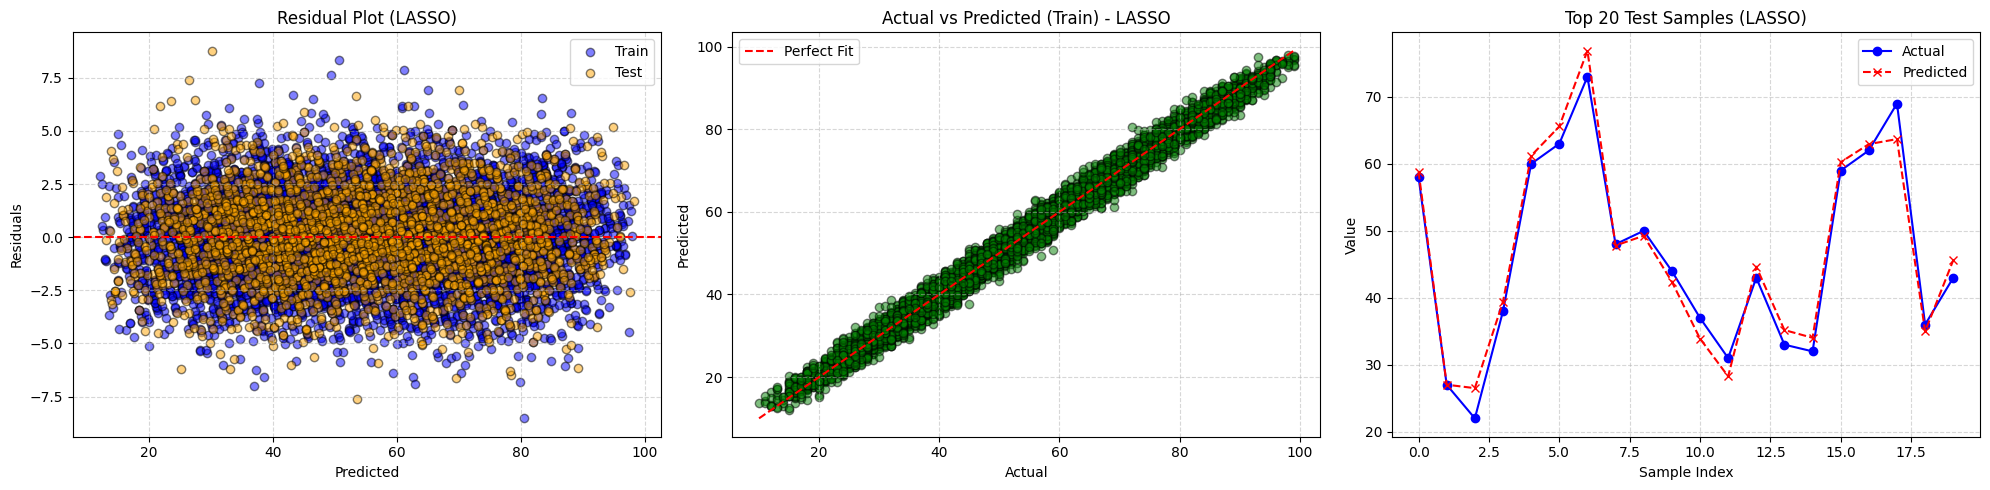


📊 HASIL EVALUASI: RIDGE
R2 Score (Test) : 0.9883
MSE             : 4.2669
MAE             : 1.6366
RMSE            : 2.0656
Fitur Terpilih: [np.str_('Hours Studied'), np.str_('Previous Scores'), np.str_('Extracurricular Activities'), np.str_('Sleep Hours'), np.str_('Sample Question Papers Practiced')]


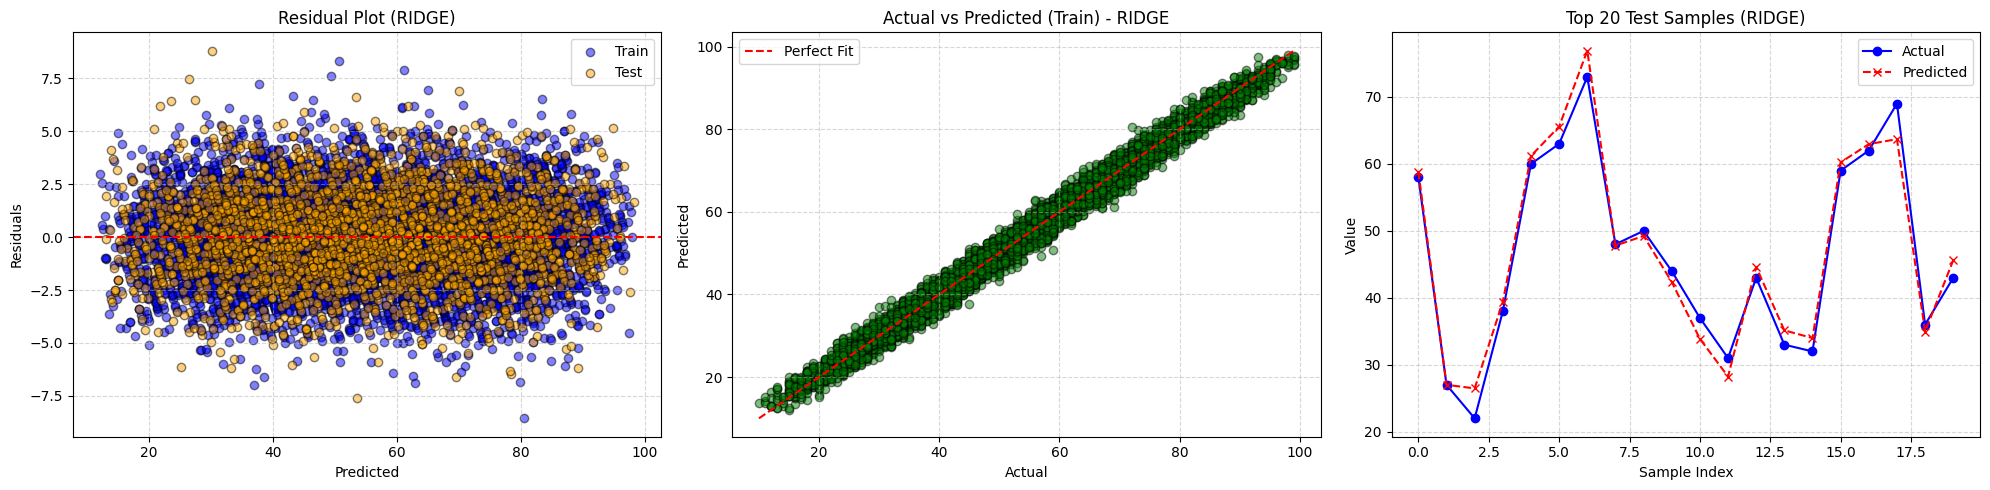

In [220]:
# ==============================================================================
# CELL EVALUASI FINAL (LENGKAP: R2, MSE, MAE, RMSE)
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -----------------------------------------------------------
# 1. PERSIAPAN DATA (Safety Check)
# -----------------------------------------------------------
target_col = 'Performance Index'
feature_names_safe = df.drop(columns=[target_col]).columns.tolist()

print(f"✅ Fitur yang terdeteksi: {feature_names_safe}")

# -----------------------------------------------------------
# 2. FUNGSI EVALUASI
# -----------------------------------------------------------
def evaluate_and_plot_robust(model_grid, model_name, X_train, y_train, X_test, y_test, feature_names):
    y_test_np = np.array(y_test).flatten()
    y_train_np = np.array(y_train).flatten()
    
    # Prediksi menggunakan model terbaik dari GridSearch
    best_model = model_grid.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Hitung Semua Metrik 
    r2 = r2_score(y_test_np, y_pred_test)
    mse = mean_squared_error(y_test_np, y_pred_test)
    mae = mean_absolute_error(y_test_np, y_pred_test)
    rmse = np.sqrt(mse)

    print(f"\n{'='*40}")
    print(f"📊 HASIL EVALUASI: {model_name}")
    print(f"{'='*40}")
    print(f"R2 Score (Test) : {r2:.4f}")
    print(f"MSE             : {mse:.4f}")  
    print(f"MAE             : {mae:.4f}") 
    print(f"RMSE            : {rmse:.4f}")

    # Cek Fitur Terpilih (Feature Selection)
    try:
        selector = best_model.named_steps['selector']
        if hasattr(selector, 'get_support'):
            mask = selector.get_support()
            selected_feats = np.array(feature_names)[mask]
            print(f"Fitur Terpilih: {list(selected_feats)}")
        else:
            print("Semua fitur digunakan.")
    except:
        print("Info: Tidak dapat menampilkan detail fitur.")

    # --- VISUALISASI ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Plot 1: Residual Plot
    residual_train = y_train_np - y_pred_train
    residual_test = y_test_np - y_pred_test
    axes[0].scatter(y_pred_train, residual_train, c='blue', alpha=0.5, label='Train', edgecolor='k')
    axes[0].scatter(y_pred_test, residual_test, c='orange', alpha=0.5, label='Test', edgecolor='k')
    axes[0].axhline(0, c='red', linestyle='--')
    axes[0].set_title(f'Residual Plot ({model_name})')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Residuals')
    axes[0].legend()
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Plot 2: Actual vs Predicted (Train)
    axes[1].scatter(y_train_np, y_pred_train, c='green', alpha=0.5, edgecolor='k')
    min_val = min(y_train_np.min(), y_pred_train.min())
    max_val = max(y_train_np.max(), y_pred_train.max())
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')
    axes[1].set_title(f'Actual vs Predicted (Train) - {model_name}')
    axes[1].set_xlabel('Actual')
    axes[1].set_ylabel('Predicted')
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.5)

    # Plot 3: Top 20 Samples Comparison (Test)
    limit = min(20, len(y_test_np))
    indices = np.arange(limit)
    axes[2].plot(indices, y_test_np[:limit], marker='o', c='blue', label='Actual')
    axes[2].plot(indices, y_pred_test[:limit], marker='x', linestyle='--', c='red', label='Predicted')
    axes[2].set_title(f'Top {limit} Test Samples ({model_name})')
    axes[2].set_xlabel('Sample Index')
    axes[2].set_ylabel('Value')
    axes[2].legend()
    axes[2].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------
# 3. EKSEKUSI
# -----------------------------------------------------------
evaluate_and_plot_robust(grid_lasso, "LASSO", X_train, y_train, X_test, y_test, feature_names_safe)
evaluate_and_plot_robust(grid_ridge, "RIDGE", X_train, y_train, X_test, y_test, feature_names_safe)

In [221]:
import pickle

# 1. Bandingkan Skor Terbaik (R2 Score dari Cross Validation)
score_lasso = grid_lasso.best_score_
score_ridge = grid_ridge.best_score_

print(f"Best CV Score - Lasso: {score_lasso:.4f}")
print(f"Best CV Score - Ridge: {score_ridge:.4f}")

best_model = None
best_algo_name = ""

# 2. Logika Pemilihan
if score_lasso > score_ridge:
    best_model = grid_lasso.best_estimator_
    best_algo_name = "Lasso"
    print("\nKESIMPULAN: Model Terbaik adalah LASSO")
else:
    best_model = grid_ridge.best_estimator_
    best_algo_name = "Ridge"
    print("\nKESIMPULAN: Model Terbaik adalah RIDGE")

# Tampilkan parameter akhir model terbaik
print(f"Parameter Terbaik: {best_model}")


# ---------------------------------------------------------
#  MENAMPILKAN FITUR TERBAIK 
# ---------------------------------------------------------
print(f"\n--- Fitur yang Dipilih oleh {best_algo_name} ---")

try:
    selector = best_model.named_steps['selector']
    
    mask = selector.get_support()
    
    nama_fitur_asli = df_house.drop(columns=['Performance Index']).columns
    
    fitur_terpilih = nama_fitur_asli[mask]
    
    print(f"Jumlah Fitur Terpilih: {len(fitur_terpilih)}")
    for i, nama_fitur in enumerate(fitur_terpilih, 1):
        print(f"{i}. {nama_fitur}")

except Exception as e:
    print(f"⚠️ Masih ada error kecil: {str(e)}")
    print("Tips: Pastikan sel tempat Anda mendefinisikan 'df_house' sudah dijalankan.")

with open(f"model/BestModel_{best_algo_name}_KERAS.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\nModel terbaik: {best_algo_name}")
print(f"File tersimpan sebagai: BestModel_{best_algo_name}_KERAS.pkl")

Best CV Score - Lasso: 0.9889
Best CV Score - Ridge: 0.9889

KESIMPULAN: Model Terbaik adalah RIDGE
Parameter Terbaik: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('selector',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x300111a80>)),
                ('regressor', Ridge(alpha=0.01, random_state=98))])

--- Fitur yang Dipilih oleh Ridge ---
Jumlah Fitur Terpilih: 5
1. Hours Studied
2. Previous Scores
3. Extracurricular Activities
4. Sleep Hours
5. Sample Question Papers Practiced

Model terbaik: Ridge
File tersimpan sebagai: BestModel_Ridge_KERAS.pkl
